# Import packages and load datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  

In [8]:
!kaggle datasets download dannielr/marvel-superheroes
!unzip '*.zip'

marvel-superheroes.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  marvel-superheroes.zip
  inflating: characters.csv          
  inflating: charactersToComics.csv  
  inflating: charcters_stats.csv     
  inflating: comics.csv              
  inflating: marvel_characters_info.csv  
  inflating: marvel_dc_characters.csv  
  inflating: marvel_dc_characters.xlsx  
  inflating: superheroes_power_matrix.csv  


In [9]:
df = pd.read_csv('/content/charcters_stats.csv')
df

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


# EDA

In [14]:
#@title 수치의 합이 가장 큰 캐릭터

Top = df.sort_values(by='Total', ascending=False)
Top.iloc[0,0]
## 내게는 듣보잡.. 그러나 그는 잡이 아니었다!! 

'Martian Manhunter'

In [38]:
#@title 팀별 각 능력별 가장 센 캐릭

Top_type = df.copy()
Top_type['rank_grp_Intelligence'] = df.groupby(['Alignment'])['Intelligence'].rank(method='dense', ascending=False)
Top_type.sort_values(by='rank_grp_Intelligence')

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,rank_grp_Intelligence
24,Ant-Man,good,100,10,23,28,32,32,225,1.0
61,Batman,good,100,18,27,42,37,100,324,1.0
537,Superman,good,100,100,100,100,94,85,579,1.0
578,Vision,good,100,72,54,95,76,70,467,1.0
417,Nova,good,100,85,67,101,100,85,538,1.0
...,...,...,...,...,...,...,...,...,...,...
513,Speedball,good,1,1,1,1,0,1,5,18.0
514,Speedy,good,1,1,1,1,0,1,5,18.0
409,Nathan Petrelli,good,1,1,1,1,0,1,5,18.0
415,Nite Owl II,good,1,1,1,1,0,1,5,18.0


In [10]:
df.Alignment.value_counts()

# good       432
# bad        165
# neutral     11

df.Alignment.isnull().sum() #3 

df.columns

Index(['Name', 'Alignment', 'Intelligence', 'Strength', 'Speed', 'Durability',
       'Power', 'Combat', 'Total'],
      dtype='object')

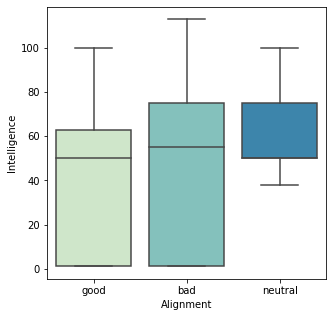

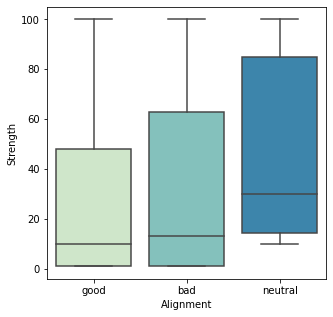

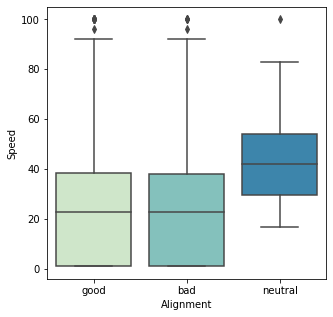

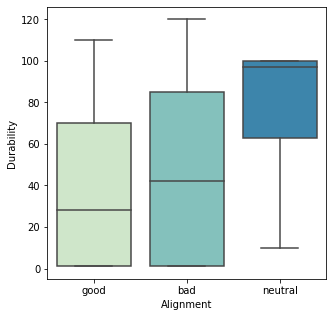

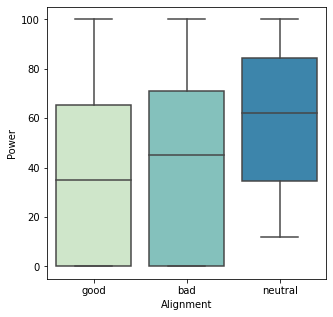

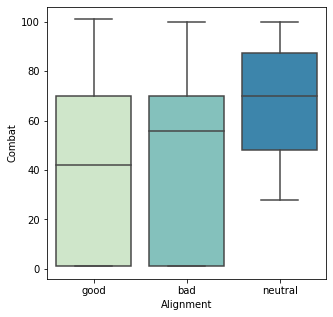

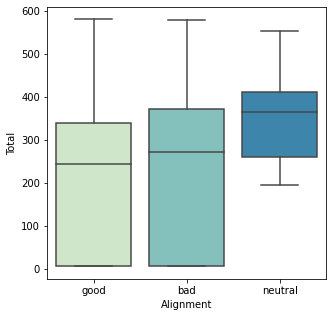

In [109]:
#@title 좋은 캐릭터와 나쁜 캐릭터 능력치들의 수치 분포

for i in range(len(capability)):
    num = capability[i]
    plt.figure(figsize=(5,5))
    sns.boxplot(x='Alignment', y=num, data=df, palette='GnBu')

# 해석 
# intelligence : neutral ?= bad > good
# strength : neutral > bad > good 
# speed : neutral > bad(outlier 존재) == good (outlier 존재)
# durability : neutral > bad > good
# power : neutral > bad > good
# combat : neutral > bad > good
# total : neutral > bad > good

# ==> 충격적인 결과.. 모든 게 열세한 good. 
# 1:1은 피하는 게 좋겠다. good은 이길 방법이 없는가?


In [122]:
#@title 모든 팀원이 참가하는 팀 대항전이 1:1 보다 유리함
df.groupby(['Alignment'])['Total'].agg({'sum','mean','max','min','std'})


,mean,max,sum,std,min
Alignment,,,,,
bad,247.212121,579,40790,174.965808,5
good,214.990741,581,92876,163.305515,5
neutral,355.363636,553,3909,122.137032,196


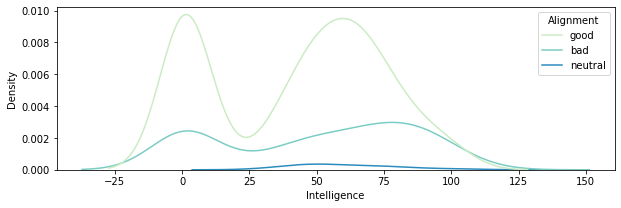

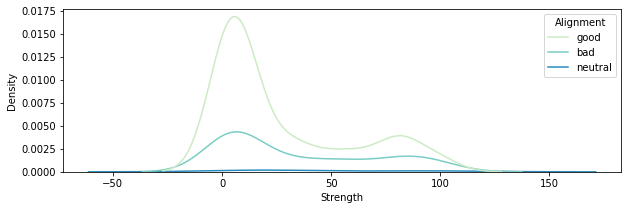

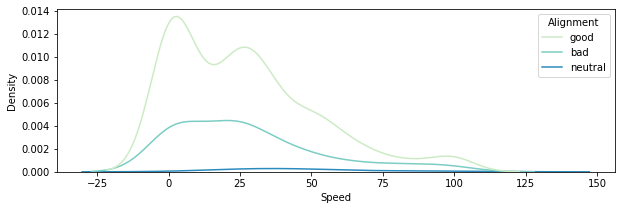

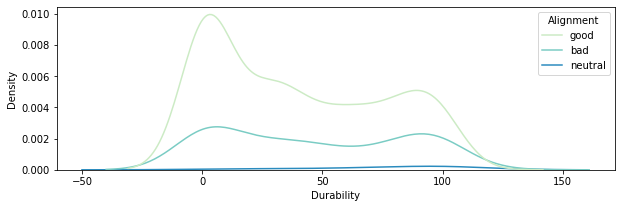

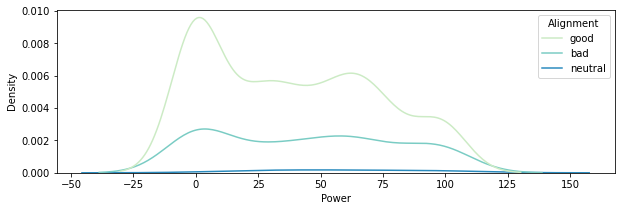

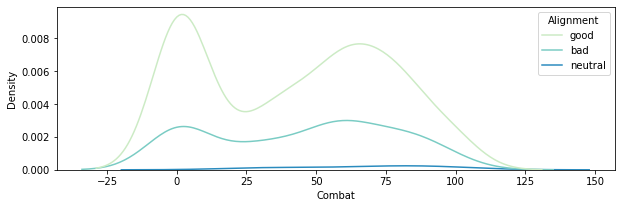

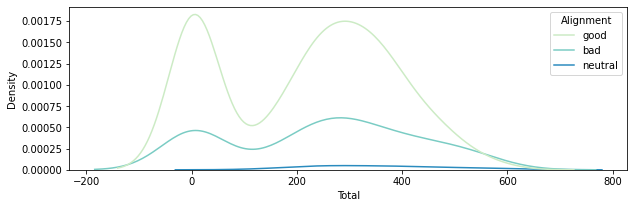

In [118]:
for i in range(len(capability)):
    num = capability[i]
    plt.figure(figsize=(10,3))
    sns.kdeplot(hue='Alignment', x=num, data=df, palette='GnBu')

# 다같이 한번에 싸우는 게 좋겠다

# Extra Mission

In [ ]:
#@title 어떤 코믹스 회사의 능력이 가장 센가?


In [184]:
#@title 격돌 시나리오 - 캐릭터 능력의 합의 평균이 큰 팀이 이긴다

# 열세인 팀 고르기 for 중립 캐릭터는 열세인 팀으로 보낸다 
team_avg = df.groupby('Alignment')['Total'].mean().sort_values(ascending=True)

if team_avg.index[0] == 'good':
    df['new_team'] = np.where(df['Alignment'] == 'neutral', 'good', df['Alignment'])
elif team_avg.index[0] == 'bad':
    df['new_team'] = np.where(df['Alignment'] == 'neutral', 'bad', df['Alignment'])

new_team_avg = df.groupby('new_team')['Total'].mean()
new_team_avg

# 결과 - neutral을 열세인 팀으로 보내도, good은 진다

new_team
bad     247.212121
good    218.476298
Name: Total, dtype: float64

In [185]:
df.loc[df['Name']=='Bizarro']

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,new_team
82,Bizarro,neutral,75,95,100,100,95,85,550,good


# Extra Mission - 자유로운 EDA

In [89]:
#@title 팀별 각 능력별 가장 센 캐릭

Top_capa_by_grp = df.copy()
Top_capa_by_grp.sort_values(by=['Alignment', 'Total'], ascending=[True, False])

capability = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat', 'Total']

for i in capability:
    Top_capa_by_grp['rank_grp_'+i] = df.groupby(['Alignment'])[i].rank(method='first', ascending=False)


In [90]:
rank_capability = [c for c in Top_capa_by_grp.columns if c not in df.columns]
rank_capability 

['rank_grp_Intelligence',
 'rank_grp_Strength',
 'rank_grp_Speed',
 'rank_grp_Durability',
 'rank_grp_Power',
 'rank_grp_Combat',
 'rank_grp_Total']

In [92]:
dfs = []
for idx, val in enumerate(rank_capability):
    df_temp = pd.DataFrame()
    df_temp = Top_capa_by_grp[Top_capa_by_grp[val] == 1] 
    dfs.append(df_temp)

Top_ranker_capa_by_grp = pd.concat(dfs)
Top_ranker_capa_by_grp.drop_duplicates(inplace=True)

In [144]:
Top_ranker_capa_by_grp.sort_values(by='Alignment')

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,rank_grp_Intelligence,rank_grp_Strength,rank_grp_Speed,rank_grp_Durability,rank_grp_Power,rank_grp_Combat,rank_grp_Total
386,Mister Mxyzptlk,bad,113,10,12,14,100,28,277,1.0,102.0,111.0,112.0,15.0,109.0,79.0
5,Abraxas,bad,88,100,83,99,100,56,526,15.0,1.0,8.0,21.0,1.0,62.0,9.0
11,Air-Walker,bad,50,85,100,85,100,40,460,84.0,19.0,1.0,38.0,2.0,98.0,21.0
201,Doomsday,bad,88,80,67,120,100,90,545,21.0,30.0,17.0,1.0,8.0,12.0,5.0
16,Amazo,bad,75,100,100,100,100,100,575,42.0,2.0,2.0,2.0,3.0,1.0,3.0
242,General Zod,bad,94,100,96,100,94,95,579,13.0,6.0,5.0,12.0,23.0,7.0,1.0
24,Ant-Man,good,100,10,23,28,32,32,225,1.0,204.0,202.0,216.0,224.0,252.0,238.0
1,A-Bomb,good,38,100,17,80,17,64,316,247.0,1.0,254.0,83.0,282.0,129.0,137.0
85,Black Bolt,good,75,67,100,84,100,56,482,48.0,75.0,1.0,75.0,3.0,167.0,15.0
525,Stardust,good,88,85,100,110,100,85,568,34.0,35.0,11.0,1.0,28.0,43.0,3.0


In [157]:
# 각 팀별 total 기준 Top 5
total_top_5 = Top_capa_by_grp.loc[Top_capa_by_grp['rank_grp_Total']<6,['Alignment','Name','Total']]
total_top_5

,Alignment,Name,Total
16,bad,Amazo,575
28,NaN,Anti-Venom,459
82,neutral,Bizarro,550
98,NaN,Blackwulf,200
186,neutral,Deadpool,395
201,bad,Doomsday,545
203,bad,Dormammu,546
238,neutral,Galactus,553
242,bad,General Zod,579
318,neutral,Juggernaut,430
